<a href="https://colab.research.google.com/github/natnj/NJ-projects-pub/blob/main/NJ_6_8701_PSET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6.8701 | 6.8700[J] | HST.507[J]**



#**Fall 2023 Problem Set 1**

Due: Monday September 25 at 11:59 PM EDT

Create a copy of this notebook and work on your local copy.

Submit .ipynb file as well as PDF to Canvas.

## Imports/Installation

In [ ]:
!apt install samtools bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  bedtools libhts3 libhtscodecs2 samtools
0 upgraded, 4 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,525 kB of archives.
After this operation, 3,818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 1,525 kB in 2s (970 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 120901 files and directories cu

In [ ]:
%pip install sklearn scipy pyranges biopython pyjaspar pysam pyfaidx logomaker anndata torch

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from pyjaspar import jaspardb
import anndata
import pyranges
import pysam
import torch

# **1.1 Gibbs sampling and clustering**


## 1.1.1 Gibbs sampling for motif discovery

In this problem, you will implement a Gibbs sampler to discover sequence motifs.

Recall the Gibbs sampling algorithm for this problem: Initialize the motif position in each sequence. Until convergence: re-estimate the position weight matrix (PWM) from all the motifs except one, score every position in the excluded sequence, and sample a $k$-mer from the excluded sequence with probability proportional to the score.

We have intentionally not specified many of the implementation details. Describe and justify the design decisions you made in your implementation. For example, how do you choose the sequence to exclude when recomputing the position weight matrix?

In [ ]:
alphabet = ["A", "C", "G", "T"]

### GibbsSampler:
### INPUTS:	S - list of sequences
###		    L - length of motif
###	OUTPUT:	PWM - 4 x L list with frequencies of each base at each position
###               Order of bases should be consistent with alphabet variable
def GibbsSampler(S, L):
    PWM = [[0 for _ in range(L)] for _ in range(len(alphabet))]

    ### YOUR CODE HERE ###

    return PWM

### ADD FUNCTIONS HERE ###

###########################
# NO NEED TO MODIFY BELOW #
###########################

def get_motif_seq(PWM):
    motif_seq = ""
    for i in range(len(PWM[0])):
        comp = [row[i] for row in PWM]
        ind = max(range(len(comp)), key = comp.__getitem__)
        motif_seq += alphabet[ind]
    return motif_seq

def print_PWM(PWM, L):
    PWM_comp = []
    PWM_comp.append("||" + "|".join([str(i) for i in range(1, L + 1)]) + "|")
    PWM_comp.append("|-" * (L + 1) + "|")
    for i in range(4):
        PWM_comp.append("|" + alphabet[i] + "|" + "|".join([str(round(val, 2)) for val in PWM[i]]) + "|")
    print("\n".join(PWM_comp) + "\n")

def print_logo(PWM):
    import logomaker
    PWM = np.array(PWM).T
    PWM = pd.DataFrame(PWM, columns = alphabet)
    logomaker.Logo(PWM, fade_below = 0.8)

def run_GibbsSampler(S, L, n):
    motif_seqs, motif_PWM = {}, {}
    for i in range(n):
        PWM = GibbsSampler(S, L)
        motif_seq = get_motif_seq(PWM)
        motif_seqs.setdefault(motif_seq, 0)
        motif_seqs[motif_seq] += 1
        motif_PWM[motif_seq] = PWM
    best_motif = max(motif_seqs.keys(), key = lambda x: motif_seqs[x])
    print("Most consistent motif: \n" + best_motif + "\n")
    print("PWM (paste into text block):")
    print_PWM(motif_PWM[best_motif], L)
    print("Sequence logo:")
    print_logo(motif_PWM[best_motif])

In [ ]:
!wget -c https://www.dropbox.com/sh/u3hp274o6cg98qn/AAA31BUmilIxZU6-bwUtQnRTa?dl=1 -O gibbs_motifs.zip
!unzip -o gibbs_motifs.zip -d gibbs_motifs
os.unlink("gibbs_motifs.zip")
gibbs_motifs = {}
for fname in os.listdir("gibbs_motifs"):
    with open(os.path.join("gibbs_motifs", fname), "r") as R:
        gibbs_motifs[fname] = R.read().strip().split()

--2023-09-13 00:26:17--  https://www.dropbox.com/sh/u3hp274o6cg98qn/AAA31BUmilIxZU6-bwUtQnRTa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/dl/u3hp274o6cg98qn/AAA31BUmilIxZU6-bwUtQnRTa [following]
--2023-09-13 00:26:18--  https://www.dropbox.com/sh/dl/u3hp274o6cg98qn/AAA31BUmilIxZU6-bwUtQnRTa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73dfa998e391d5924ca5b81196.dl.dropboxusercontent.com/zip_download_get/BnDWmuEqpPePFzijci891h88iO5Wct6mzBOf77kKcKA4MgxZdq4g7uwFRAFUpVVxLNB2r4X91nwscFzEzbObEJ-MCYtPuBr80FIeTiMDx0U91g?dl=1# [following]
--2023-09-13 00:26:18--  https://uc73dfa998e391d5924ca5b81196.dl.dropboxusercontent.com/zip_download_get/BnDWmuEqpPePFzijci891h88iO5Wct6mzBOf77kKcKA4MgxZdq4g7uwFRAFUpVVxLNB2r4X91nwscFzEzbObEJ-MC

### 1.1.1a Test cases
We have provided four test cases. `data1` is a synthetic data set where
the motif is identical across the sequences. `data2` is a synthetic data set
with a degenerate motif. `data3` and `data4` are yeast transcription factor
binding sites of ACE2 and MBP1, respectively.

Run your Gibbs sampler on the test data to discover motifs of length 10. You will need to repeat this procedure several times on each data set due to the stochastic nature of Gibbs sampling.

Report the most consistently found PWM for each sequence.

Most consistent motif: 
AAAAAAAAAA

PWM (paste into text block):
||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0|0|0|0|0|0|0|0|0|0|
|C|0|0|0|0|0|0|0|0|0|0|
|G|0|0|0|0|0|0|0|0|0|0|
|T|0|0|0|0|0|0|0|0|0|0|

Sequence logo:


/usr/local/lib/python3.10/dist-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


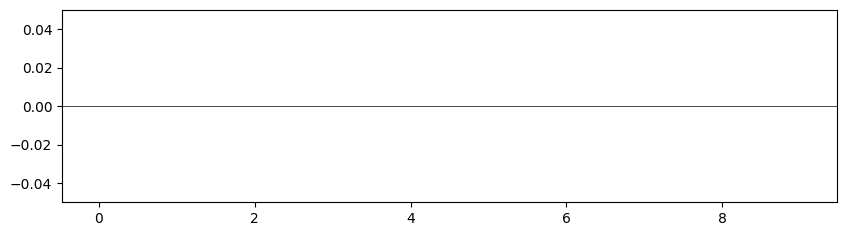

In [ ]:
run_GibbsSampler(gibbs_motifs["data1.txt"], 10, 1)

**Answer here:**

`data1` PWM:

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|||||||||||
|G|||||||||||
|C|||||||||||
|T|||||||||||

`data2` PWM:

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|||||||||||
|G|||||||||||
|C|||||||||||
|T|||||||||||

`data3` PWM:

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|||||||||||
|G|||||||||||
|C|||||||||||
|T|||||||||||

`data4` PWM:

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|||||||||||
|G|||||||||||
|C|||||||||||
|T|||||||||||

## 1.1.2 K-means clustering

In this problem, you will implement k-means clustering on the expression profiles of two genes across a set of breast cancer patients. We have collected expression data from a pair of tissue types from the same set of 700 patients. We now wish to find clusters in this data that correspond to different breast cancer subtypes.

Your first task is to add code to the following code block to implement the k-means algorithm. To do this, you will have to complete the `assignPoints` and `recalculateCtrs` functions, and then add calls to these functions to the
`run_kmeans` function.

In [ ]:
def assignPoints(tbl, ctrs):
    """Assign each of the points in tbl to the cluster with center in ctrs"""

    ptsAsgn = []

    ### YOUR CODE HERE ###

    return ptsAsgn


def recalculateCtrs(tbl, ctrs, ptsAsgn):
    """Update the centroids based on the points assigned to them"""

    newCtrs = []

    ### YOUR CODE HERE ###

    return newCtrs

def run_kmeans(dataTable):
    """initializes centroids, stop criterion and step counting for clustering"""
    newCtrs = [[5, 0], [5, 40], [5, 80]]
    ptMemb = assignPoints(dataTable, newCtrs)
    stopCrit = False
    stepCount = 0

    """performs k-means clustering, plotting the clusters at each step"""
    while not stopCrit:
        stepCount += 1

        plotClusters(dataTable, ptMemb, newCtrs, stepCount)

        ### YOUR CODE HERE ###

        """stop criterion - when centroids' total movement after a step is below
            the threshold, stop the algorithm"""
        stopDist = 0;
        for i in range(len(newCtrs)):
            stopDist += np.linalg.norm(np.array(oldCtrs[i]) - np.array(newCtrs[i]))
        if stopDist < 5:
            stopCrit = True

###########################
# NO NEED TO MODIFY BELOW #
###########################


def plotClusters(tbl, ptMemb, cntrs, stepCnt):
    """Generate a scatterplot of the current k-means cluster assignments"""
    pt_colors = ["salmon", "lightgreen", "lightblue"]
    ctr_colors = ["red", "green", "blue"]
    for i in range(len(cntrs)):
        pts = [tbl[j] for j in range(len(tbl)) if ptMemb[j] == i]
        plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts], color = pt_colors[i], s = 10)
        plt.scatter([cntrs[i][0]], [cntrs[i][1]], color = ctr_colors[i], s = 100, facecolors = "none")
    plt.title("Step " + str(stepCnt))
    plt.xlabel("BRCA1 Gene Expression")
    plt.ylabel("SOX2 Gene Expression")
    plt.show()

You will need to download the following [files](https://www.dropbox.com/sh/670bklch7qly756/AAAVFn3ufuUPaPcVTalsLrMZa?dl=0) and upload them to colab using the following code block.

In [ ]:
!wget -c https://www.dropbox.com/sh/u73ktzeykydjsos/AABtGwiaaE-iMOd-FWNXJE6Da?dl=0 -O tissue_data.zip
!unzip -o tissue_data.zip -d tissue_data
os.unlink("tissue_data.zip")
tissue_data = {}
for fname in os.listdir("tissue_data"):
    tissue_data[fname] = pd.read_csv(os.path.join("tissue_data", fname), sep="\t", header=None).values.tolist()

--2023-09-13 00:29:37--  https://www.dropbox.com/sh/u73ktzeykydjsos/AABtGwiaaE-iMOd-FWNXJE6Da?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/u73ktzeykydjsos/AABtGwiaaE-iMOd-FWNXJE6Da [following]
--2023-09-13 00:29:37--  https://www.dropbox.com/sh/raw/u73ktzeykydjsos/AABtGwiaaE-iMOd-FWNXJE6Da
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a74d2f7e51022bfaefc212960.dl.dropboxusercontent.com/zip_download_get/BnAOmqgv9x-vBxag9NYZ1NEnXhPBZpqFPuhX2_Bzim3uwQJGCQRKTw9GCNhY1dmjwxvmxnvY8pQUWIk_YsGQ6pp4gTQsaRiLSmuGZUMx5xn7JQ# [following]
--2023-09-13 00:29:38--  https://uc1a74d2f7e51022bfaefc212960.dl.dropboxusercontent.com/zip_download_get/BnAOmqgv9x-vBxag9NYZ1NEnXhPBZpqFPuhX2_Bzim3uwQJGCQRKTw9GCNhY1dmjwxvmxnvY8pQUWIk_YsGQ6pp4gTQs

### 1.1.2b Evaluation on `tissue1`

Run the following code block to test your implementation on `tissue1`. If your implementation is correct, the algorithm will converge in four steps.

In [ ]:
run_kmeans(tissue_data["tissue1_data.txt"])

IndexError: ignored

### 1.1.2c Evaluation on `tissue2`
Now run your code on `tissue2` (your algorithm should converge in six steps this time). What went wrong? What strategy would you employ to find the settings of the algorithm so that it identifies the most obvious clusters, assuming you couldn't see the clusters ahead of time?

In [ ]:
run_kmeans(tissue_data["tissue2_data.txt"])

IndexError: ignored

### 1.1.2d  Different approaches
Experiment with the code in `run_kmeans` to try different approaches. Once you are satisfied with your solution, describe how your solution addressed the original problem using some of the output plots for reference.

In [ ]:
def run_kmeans(dataTable):
    """initializes centroids, stop criterion and step counting for clustering"""
    newCtrs = [[5, 0], [5, 40], [5, 80]]
    ptMemb = assignPoints(dataTable, newCtrs)
    stopCrit = False
    stepCount = 0

    """performs k-means clustering, plotting the clusters at each step"""
    while not stopCrit:
        stepCount += 1

        plotClusters(dataTable, ptMemb, newCtrs, stepCount)

        ### YOUR CODE HERE ###

        """stop criterion - when centroids' total movement after a step is below
            the threshold, stop the algorithm"""
        stopDist = 0;
        for i in range(len(newCtrs)):
            stopDist += np.linalg.norm(np.array(oldCtrs[i]) - np.array(newCtrs[i]))
        if stopDist < 5:
            stopCrit = True

In [ ]:
run_kmeans(tissue_data["tissue2_data.txt"])

IndexError: ignored

### 1.1.2e Fuzzy k-means
Describe how you would implement fuzzy k-means clustering using the above set of functions. Don't worry about implementing the fuzzy k-means or generating any more plots.

# **1.2 Hidden Markov Models**

In this problem, we will implement the eight-state Hidden Markov Model described in lecture to annotate regions as CpG islands, or regions with high CpG dinucleotide frequency. Recall the model has states 𝐴+, 𝐶+, 𝐺+, 𝑇+ which emit nucleotides within CpG islands and states 𝐴−, 𝐶−, 𝐺−, 𝑇− which emit nucleotides outside CpG islands.

## 1.2.1 Implement the eight-state Hidden Markov Model.

The training data is the sequence of human chromosome 21 and an existing CpG island annotation which we will use as ground truth. Train the model by computing the maximum likelihood estimates of the model parameters (recall these are relative frequencies). Please also provide:

1. Description of how you handle zeroes in the estimated parameters. (Hint: you may need to do some smoothing in the emission probability matrix to avoid calculating $\log(0)$)
2. The initial state distribution and justification for how it was chosen.
3. The final transition probability matrix.
4. The final emission probability matrix.


In [ ]:
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr21.fa.gz
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr22.fa.gz
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/database/cpgIslandExt.txt.gz
### Schema at https://hgdownload.cse.ucsc.edu/goldenpath/hg38/database/cpgIslandExt.sql

## 1.2.2 Annotate CpG islands using the Viterbi algorithm
Use the Viterbi algorithm to annotate CpG islands in the region surrounding the SRY (sex determining region Y)-box 10 gene (SOX10). We are interested in the region between positions 38,000,000 - 39,000,000 of human chromosome 22. Return a list of lists corresponding to the CpG annotations (e.g. [[1, 1000], [10000, 20000]]).

## 1.2.3 Evaluation

Evaluate the performance of the model by computing its false positive and false negative rates on the test data against the ground truth annotation. Define a true positive to be a predicted CpG island of which at least 50% overlaps a true CpG island.

Are these two rates equal? If not, what causes this bias?


## 1.2.4 Parameter tuning

Could we improve the performance of the model by tuning parameters? If so, describe how you would do so (you do not have to implement your suggestions). If not, describe and justify some modifications to the model which could reduce its error rate.


## 1.2.5 Model size

One change to your model that you might consider is to add more states to it. Nevertheless, the number of states will still be finite. Explain why this limits the model's ability to capture phenomena that span arbitrarily large sequences.


## 1.2.6 Multiple lines of evidence

One alternative approach to improve the quality of annotations is combining multiple lines of evidence.

Do not implement, but describe and justify some biological criteria for filtering the output of a sequence-based CpG island classifier to improve its performance.

# **1.3 Motif finding**

In this problem we will derive the probabilistic model underlying position weight matrices (PWMs) and use it to study CCCTC-binding factor (CTCF) binding sites. CTCF is a conserved zinc-finger protein which binds to thousands of locations in the human genome and acts as an insulator/repressor.

## 1.3.1 Motif model
 Explain how to estimate the motif model $M = [m_{ij}]$ where $m_{ij} = P(position~i = nucleotide~j)$.

## 1.3.2 Background model

Describe and justify an algorithm to estimate the background model 𝐵 across the whole genome. What assumptions does your model make? What are some of its weaknesses?


## 1.3.3 Implementation
Recall that a PWM gives the log odds of observing a particular nucleotide at a particular position in the motif model against the background distribution.

Implement your algorithm from 1.3.1 to estimate 𝑀 from some binding sites from ENCODE and your algorithm from 1.3.2 to estimate 𝐵 from chr21 for ENCFF029THO. Then, estimate a PWM for CTCF using 𝑀 and 𝐵. Report all of the distributions.

In [ ]:
!wget -q -c https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr21.fa.gz -O chr21.fa.gz
!gunzip -f chr21.fa.gz
!samtools faidx chr21.fa
!wget -q -c https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr22.fa.gz -O chr22.fa.gz
!gunzip -f chr22.fa.gz
!samtools faidx chr22.fa
!wget -q -c https://www.encodeproject.org/files/ENCFF029THO/@@download/ENCFF029THO.bed.gz -O ENCFF029THO.bed.gz
!wget -q -c https://www.encodeproject.org/files/ENCFF237RIC/@@download/ENCFF237RIC.bed.gz -O ENCFF237RIC.bed.gz

In [ ]:
### ENCODE narrowPeak format
def load_narrow_peak(bed, chr:str=None):
    df = pd.read_csv(bed, header=None, sep="\t")
    df.columns = ["Chromosome", "Start", "End", "name", "score", "Strand", "signalValue", "pValue", "qValue", "peak"]
    if chr is not None:
      df = df.loc[df["Chromosome"]==chr, :]
    return pyranges.PyRanges(df)

tbl = {}
for sample in ["ENCFF029THO", "ENCFF237RIC"]:
    for chr in ["chr21", "chr22"]:
      seq = pyranges.get_sequence(load_narrow_peak("%s.bed.gz" % sample, chr), "%s.fa" % chr)
      tbl["%s_%s" % (sample, chr)] = seq
      print(sample, chr, len(seq))


### To Implement as well: get background
#background =

ENCFF029THO chr21 500
ENCFF029THO chr22 1005
ENCFF237RIC chr21 526
ENCFF237RIC chr22 1058


## 1.3.4 Convolutional neural network for motif finding

Implement a simple PyTorch CNN to classify CTCF sequences for the same data.

# **1.4 Enhancer-gene linking**

In this module, you will attempt a few methods for linking enhancers to genes, as well as estimating gene expression from chromatin data.


Using EpiMap (http://compbio.mit.edu/epimap/) data, we can look at enhancer regions and see which genes they control.

## 1.4.1 Find all enhancer-gene pairs within 100Kbp (100,000 base pairs) from the TSS of a gene


Each row of the AnnData objects corresponds to a sample, and each column of the anndata object corresponds to a feature, i.e. a peak or a gene.

Using the "interval" field of the RNA and chromatin/DNase objects, compute the enhancer-gene pairs.

Specifically, find peaks that overlap Enh states in BSS00369 (Brain, frontal cortex)

In [ ]:
!wget -c https://www.dropbox.com/sh/d11ndep99xc6aka/AAByrCihV_V7Izes0wmdmiJLa?dl=1 -O linking.zip
!unzip -o linking.zip -d linking
os.unlink("linking.zip")

rna = anndata.read("linking/rna.h5ad")
h3k27ac = anndata.read("linking/H3K27ac_reduced.h5ad")
dnase = anndata.read("linking/DNase-seq_reduced.h5ad")

--2023-09-13 18:25:09--  https://www.dropbox.com/sh/d11ndep99xc6aka/AAByrCihV_V7Izes0wmdmiJLa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/dl/d11ndep99xc6aka/AAByrCihV_V7Izes0wmdmiJLa [following]
--2023-09-13 18:25:09--  https://www.dropbox.com/sh/dl/d11ndep99xc6aka/AAByrCihV_V7Izes0wmdmiJLa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd625a8665d994bb0a573be163b.dl.dropboxusercontent.com/zip_download_get/BnA_ALlgP47CU82Ysgh-pw5YruY-PL5xUdDWUTtm8V3v3gVEv1Lf9TwWDgJnm6kNItSCNtiRfdTN6eKhJE9zRz3ILTZ3szcik2p01KsiXBmffA?dl=1# [following]
--2023-09-13 18:25:10--  https://ucd625a8665d994bb0a573be163b.dl.dropboxusercontent.com/zip_download_get/BnA_ALlgP47CU82Ysgh-pw5YruY-PL5xUdDWUTtm8V3v3gVEv1Lf9TwWDgJnm6kNItSCNtiRfdTN6eKhJE9zRz3IL

In [ ]:
eqtl = pd.read_csv("linking/gtex_frontal_cortex_eQTL_hg19.tsv.gz", sep="\t")

### Use the 18-state ChromHMM model
chmm = pd.read_csv("https://personal.broadinstitute.org/cboix/epimap/ChromHMM/observed_aux_18_hg19/CALLS/BSS00369_18_CALLS_segments.bed.gz", sep="\t", header=None).iloc[:, range(4)]
chmm.columns = ["Chromosome", "Start", "End", "state"]
chmm = chmm.loc[chmm["state"].str.startswith("Enh"), :]
print(chmm["state"].value_counts())
## TO IMPLEMENT: convert to PyRanges and intersect with h3k27ac.var

EnhWk     55269
EnhA1     38630
EnhA2     31612
EnhBiv    11401
EnhG1      8672
EnhG2      4124
Name: state, dtype: int64


## 1.4.2 Compute an activity-by-contact like model of enhancer-gene links and compare to nearest-gene

ABC takes the power law (provided, given a distance), multiplies by some activity, such as the geometric mean of the H3K27ac and DNase-seq activity, and then divides by all ABC scores for one gene.

Take all enhancer-promoter pairs you generated in the previous section, and compute the ABC distance (power law), and 3 ABC like scores, using activity of: H3K27ac, DNase-seq, and sqrt(H3K27ac*DNase-seq) in BSS00369, and compare all 4 predicions to GTEx eQTLs.

Limit eQTLs to the ranges of the enhancers you have, and try to see what the predicitve accuracy of the linking is on the eQTLs.


In [ ]:
def abc_distance(distance, hic_power=0.87):
    scale = -4.80 + 11.63 * hic_power
    offset = np.clip(np.abs(distance), 5000, np.inf)
    return np.exp(scale + -1 * hic_power * np.log1p(offset))

## 1.4.3 Correlate enhancers to gene expression

Use a simple model to use H3K27ac-RNA and DNase-seq-RNA correlation with RNA-seq in different enhancer types.

Similar to 1.4.2, modify the algorithm to use correlation times activity instead of just activity.
So calculate three more scores, using

1. H3K27ac * Cor(H3K27ac, RNA)^2,
2. DNase-seq * Cor(DNase-seq, RNA)^2
3. sqrt(H3K27ac * DNase-seq) * Cor(sqrt(H3K27ac*DNase-seq), RNA)^2

How do each of the pairings compare? Does correlation improve certain predictions and hurt others?

In [ ]:
def correlation(A, B, wt=None):
    "Fast pearson correlation for one matrix against another"
    if wt is None:
        wt = np.ones(A.shape[1])
    wt = np.ravel(wt) / np.sum(wt)
    Am = (A.T - np.dot(A, wt)).T
    Bm = (B.T - np.dot(B, wt)).T
    Am_sum_sq = np.dot(Am * Am, wt)
    Bm_sum_sq = np.dot(Bm * Bm, wt)
    numer = np.dot(Am * Bm, wt)
    denom = np.sqrt(Am_sum_sq * Bm_sum_sq)
    cor = np.divide(numer, denom, out=np.zeros_like(numer), where=denom != 0)
    return cor

def compute_correlation(links:pd.DataFrame, rna:anndata.AnnData, dna:anndata.AnnData,
                        batch_size=1000, enh_col="gene", gene_col="gene"):
    comm_samples = set(rna.obs_names.values) & set(h3k27ac.obs_names.values)
    cor = np.zeros(links.shape[0])
    for start in np.arange(0, links.shape[0], batch_size):
        end = min(start + batch_size, links.shape[0])
        enhancers = links[enh_col].values[start:end]
        genes = links[gene_col].values[start:end]
        rna_data = rna[comm_samples, genes].X.T
        dna_data = dna[comm_samples, enhancers].X.T
        cor[start:end] = correlation(rna_data, dna_data)
    return cor

## 1.4.4 Estimate gene expression from chromatin data

If peak-gene links can accurately capture correlation, the additive effect of them should allow for gene expression estimation.

Try to estimate the RNA-seq by aggregating the BSS00369 enhancer-gene links you have, and then correlate to BSS00369 RNA-seq expression. What samples' transcriptomes are best predicted from the BSS00369 (Frontal Cortex) enhancer-gene links?

Remember that the ABC links are normalized per-gene, so you may have to multiply by the activity per gene.

# **1.5 Recurrent neural network for CpG Islands (Optional for 6.8701 undergraduate version)**

Implement a simple recurrent neural network in PyTorch for CpG islands in the same manner as 1.2, and similarly evaluate the performance of the model. Keep the model small to be able to use CPU node instead of GPU nodes.